##    Synthetic Data Generation using Conditional Generative Adversarial Networks (CT-GAN)





References:
        -Script was devoloped with SDV.DEV User Guide (https://sdv.dev/SDV/user_guides/single_table/ctgan.html) 
        -Referenced Paper:https://arxiv.org/pdf/1907.00503.pdf
        
        

Dataset Used: "NCPES Wave 3 by cancer patient characteristics and route to diagnosis.xlsx" obtained from data.gov.uk
Dataset Type: Survey containing 57,053 records.
Url:https://data.gov.uk/dataset/9694c5b5-37bd-4d36-9043-4b568348c727/cancer-registration-national-cancer-patient-experience-survey-wave-3-by-patient-characteristics-and-route-to-diagnosis

In [43]:
#!pip install cython
#!pip install ctgan
#!pip install table_evaluator
import pandas as pd
import numpy as np


After cleaning the dataset using Power Query Editor in Microsoft Excel, a Dataset with 4558 records were obtained

In [3]:
data = pd.read_csv(r"C:\Users\Home\Jupyter\Final Cleaned-National Cancer Patient Experience Survey .csv")
data = pd.DataFrame(data)

,PATIENT_PSEUDO_ID,GENDER,QUINTILE2010,FINAL_ROUTE,AGE,STAGE,CANCER_SITE,Q01,Q10,Q11,...,Q65,Q67,Q68,Q69,Q07,Q70,Q76,Q08,Q09,Q79
0,43326,Male,2,GP referral,55-64,Missing,C67,2,1,3,...,1,2,2,3.0,1,1,2,1,1,British
1,139450,Male,3,Inpatient Elective,55-64,Missing,Other,2,1,1,...,2,2,1,3.0,1,2,2,1,1,British
2,96338,Male,4,Other outpatient,65-74,IV,C25,2,1,1,...,1,2,1,3.0,1,1,1,4,1,Missing
3,141065,Male,5 - most deprived,TWW,65-74,Missing,C16,2,1,5,...,1,2,2,3.0,1,1,1,1,1,British
4,46832,Female,5 - most deprived,Emergency presentation,65-74,Missing,C16,4,1,1,...,1,2,1,3.0,1,1,2,1,1,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,179942,Female,3,TWW,65-74,II,C50,2,1,2,...,3,2,2,3.0,1,2,1,1,2,British
4554,90018,Female,2,TWW,<55,III,C19-C20,2,1,2,...,1,2,2,3.0,1,1,1,1,1,British
4555,47373,Female,4,Screening,65-74,II,C50,2,4,1,...,2,2,1,3.0,1,1,1,1,1,British
4556,179512,Female,2,TWW,<55,II,C50,2,1,1,...,1,2,1,3.0,1,1,1,1,1,British


In [44]:
data.columns

Index(['PATIENT_PSEUDO_ID', 'GENDER', 'QUINTILE2010', 'FINAL_ROUTE', 'AGE',
       'STAGE', 'CANCER_SITE', 'Q01', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q02', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q03', 'Q30', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q04', 'Q40', 'Q41', 'Q42',
       'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q05', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q06', 'Q60',
       'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q67', 'Q68', 'Q69', 'Q07', 'Q70',
       'Q76', 'Q08', 'Q09', 'Q79'],
      dtype='object')

Package Used: ctgan from  pypi - https://pypi.org/project/ctgan/

In [46]:
from ctgan import CTGANSynthesizer
discrete_columns = ['GENDER', 'QUINTILE2010', 'FINAL_ROUTE', 'AGE',
       'STAGE', 'CANCER_SITE', 'Q01', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15',
       'Q16', 'Q17', 'Q18', 'Q19', 'Q02', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24',
       'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q03', 'Q30', 'Q31', 'Q32', 'Q33',
       'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q04', 'Q40', 'Q41', 'Q42',
       'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q05', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q06', 'Q60',
       'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q67', 'Q68', 'Q69', 'Q07', 'Q70',
       'Q76', 'Q08', 'Q09', 'Q79']  # List of Categorical_features
ctgan = CTGANSynthesizer(verbose=True)
ctgan.fit(data, discrete_columns, epochs=300)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\Home\AppData\Roaming\Python\Python39\site-packages\ctgan\data_transformer.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].to_numpy().flatten()


Epoch 1, Loss G:  1.6830,Loss D: -2.7902
Epoch 2, Loss G:  0.4144,Loss D: -3.9583
Epoch 3, Loss G: -2.3160,Loss D: -1.2971
Epoch 4, Loss G: -2.2204,Loss D: -0.2729
Epoch 5, Loss G: -1.1777,Loss D:  0.0438
Epoch 6, Loss G: -0.3849,Loss D:  0.2140
Epoch 7, Loss G: -0.2028,Loss D: -0.0095
Epoch 8, Loss G: -0.2054,Loss D:  0.5140
Epoch 9, Loss G: -0.5361,Loss D:  0.3613
Epoch 10, Loss G: -0.6403,Loss D: -0.2505
Epoch 11, Loss G: -1.6658,Loss D:  0.2346
Epoch 12, Loss G: -1.6688,Loss D:  0.5235
Epoch 13, Loss G: -1.8223,Loss D:  0.5110
Epoch 14, Loss G: -1.1842,Loss D:  0.2266
Epoch 15, Loss G: -1.0051,Loss D:  0.6270
Epoch 16, Loss G: -1.2669,Loss D:  0.2503
Epoch 17, Loss G: -1.2196,Loss D:  0.0118
Epoch 18, Loss G: -1.4829,Loss D:  0.1294
Epoch 19, Loss G: -1.6748,Loss D:  0.1194
Epoch 20, Loss G: -1.4629,Loss D: -0.0281
Epoch 21, Loss G: -1.0258,Loss D:  0.1809
Epoch 22, Loss G: -0.9351,Loss D:  0.3973
Epoch 23, Loss G: -1.2217,Loss D: -0.0143
Epoch 24, Loss G: -1.3585,Loss D:  0.3198
E

In [54]:
num_samples = 100000
samples = ctgan.sample(num_samples)

In [57]:
from pathlib import Path  
filepath = Path(r'C:\Users\Home\Jupyter\Synthetic Data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
samples.to_csv(filepath)

(4558, 78) (100000, 78)


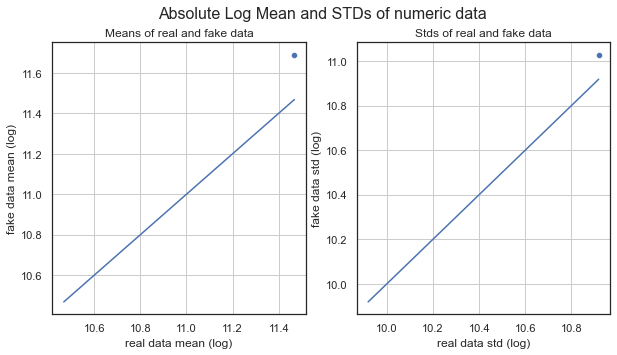

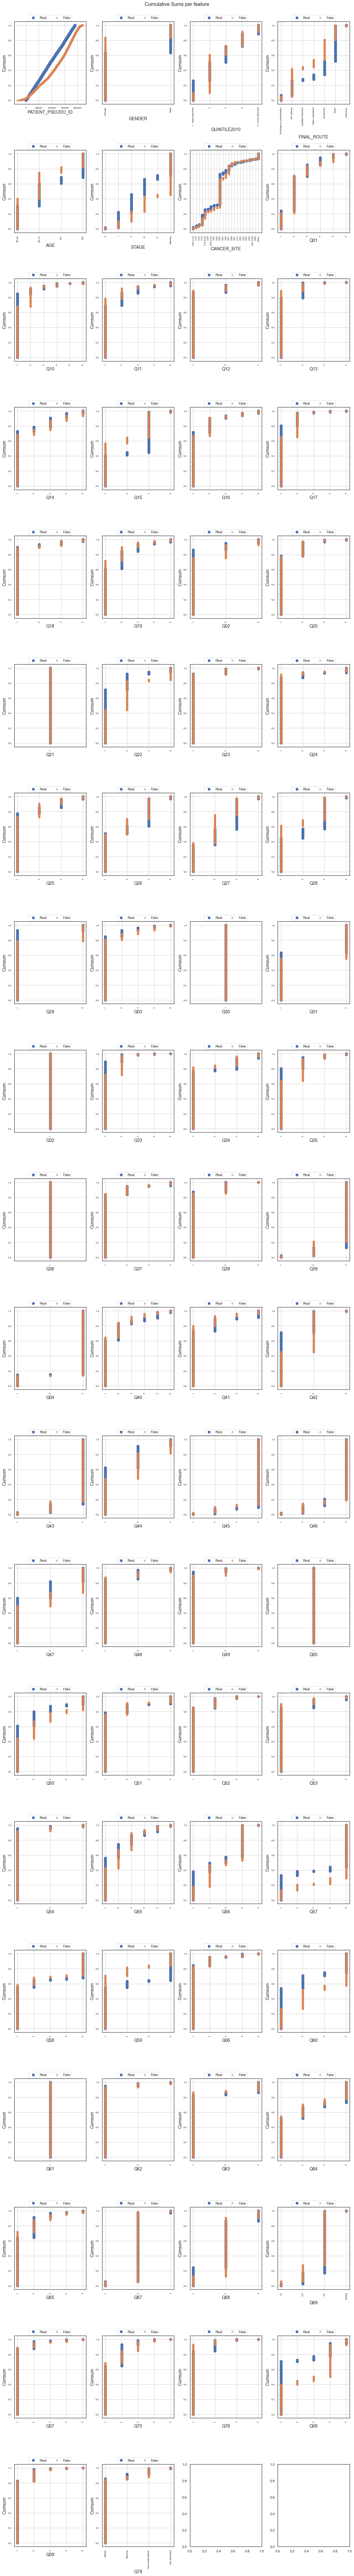

C:\Users\Home\AppData\Roaming\Python\Python39\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})


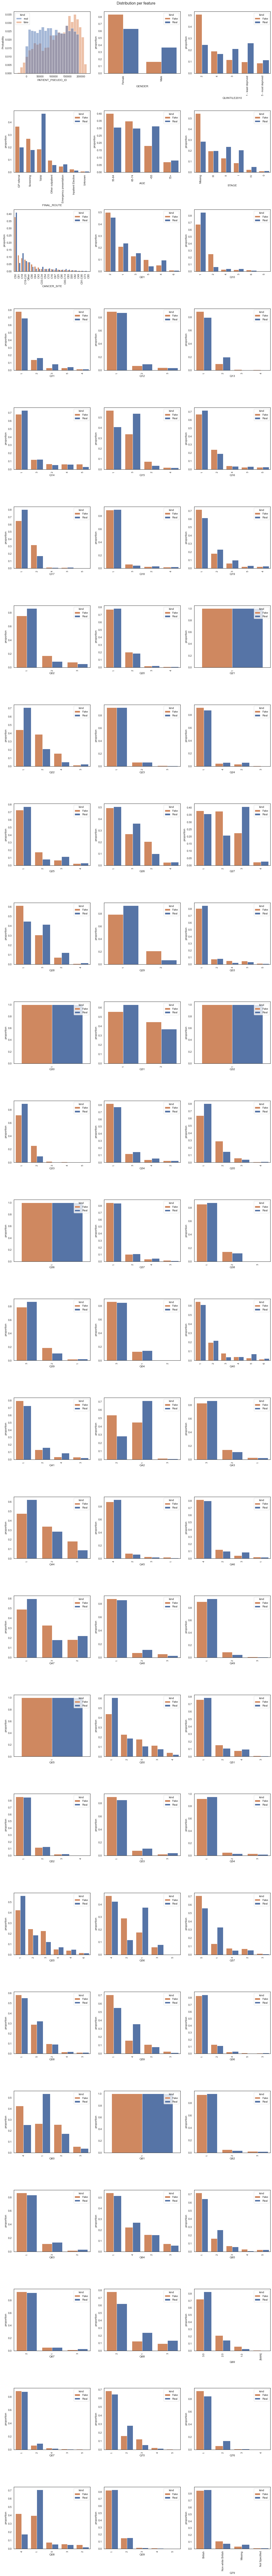

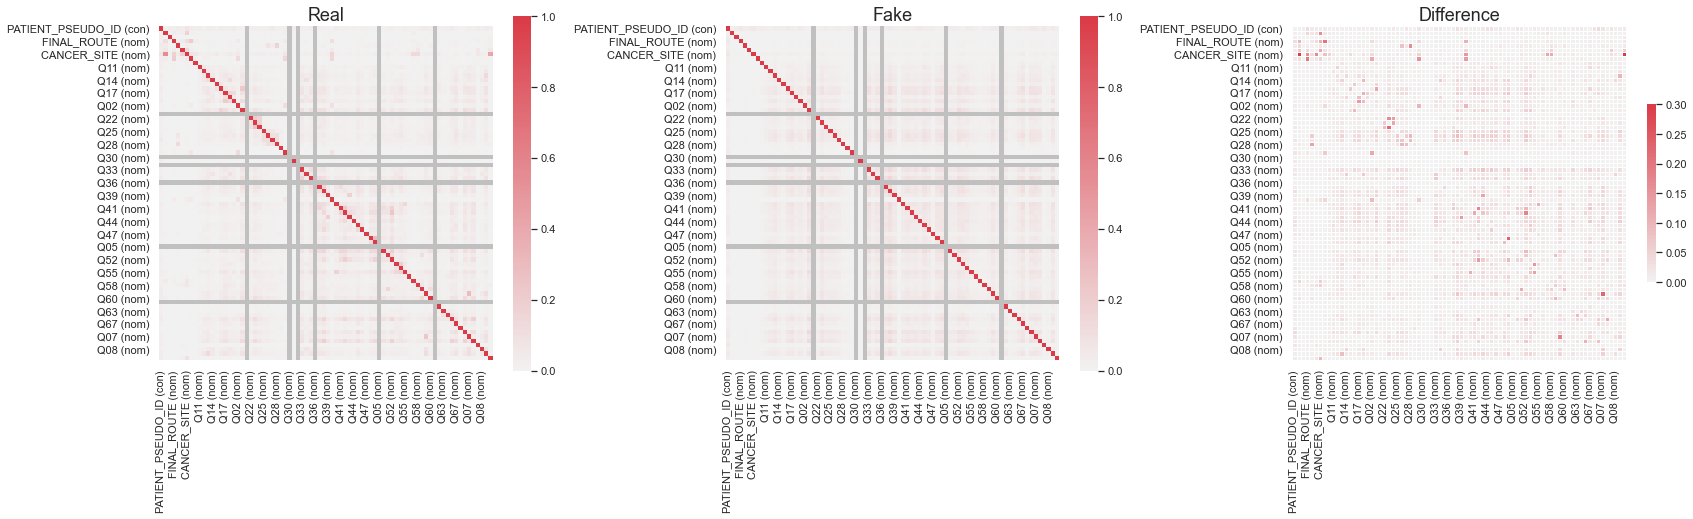

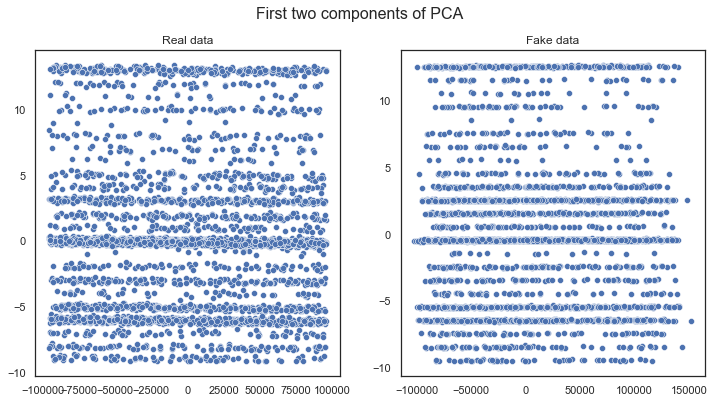

In [51]:
from table_evaluator import load_data, TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= discrete_columns)

table_evaluator.visual_evaluation() #save_dir="C:/Users/Home/Jupyter/" 

Risk Evaluation

In [59]:
#Import all libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.spatial import distance, distance_matrix
from sklearn.metrics import pairwise_distances
from datetime import datetime
import matplotlib.pyplot as plt

In [71]:
Original = pd.read_csv(r"C:\Users\Home\Jupyter\Final Cleaned-National Cancer Patient Experience Survey .csv")
CT_GAN = pd.read_csv(r"C:\Users\Home\Jupyter\Synthetic Data.csv")
CT_GAN = CT_GAN.iloc[: , 1:]

In [72]:
Original.head()

,PATIENT_PSEUDO_ID,GENDER,QUINTILE2010,FINAL_ROUTE,AGE,STAGE,CANCER_SITE,Q01,Q10,Q11,...,Q65,Q67,Q68,Q69,Q07,Q70,Q76,Q08,Q09,Q79
0,43326,Male,2,GP referral,55-64,Missing,C67,2,1,3,...,1,2,2,3.0,1,1,2,1,1,British
1,139450,Male,3,Inpatient Elective,55-64,Missing,Other,2,1,1,...,2,2,1,3.0,1,2,2,1,1,British
2,96338,Male,4,Other outpatient,65-74,IV,C25,2,1,1,...,1,2,1,3.0,1,1,1,4,1,Missing
3,141065,Male,5 - most deprived,TWW,65-74,Missing,C16,2,1,5,...,1,2,2,3.0,1,1,1,1,1,British
4,46832,Female,5 - most deprived,Emergency presentation,65-74,Missing,C16,4,1,1,...,1,2,1,3.0,1,1,2,1,1,British


In [73]:
CT_GAN.head()

,PATIENT_PSEUDO_ID,GENDER,QUINTILE2010,FINAL_ROUTE,AGE,STAGE,CANCER_SITE,Q01,Q10,Q11,...,Q65,Q67,Q68,Q69,Q07,Q70,Q76,Q08,Q09,Q79
0,122063,Female,2,GP referral,55-64,II,Other,3,1,1,...,2,2,2,3.0,2,3,1,1,1,British
1,178923,Female,2,TWW,55-64,III,C18,5,2,1,...,1,2,2,3.0,2,2,2,4,1,Non-white British
2,74353,Female,2,TWW,65-74,II,C61,1,2,1,...,1,2,2,3.0,1,1,1,1,1,British
3,186139,Female,5 - most deprived,Screening,65-74,Missing,C50,1,2,1,...,1,2,2,3.0,1,1,1,4,1,British
4,69672,Female,1 - least deprived,Screening,75+,Missing,C50,2,1,1,...,1,2,2,3.0,1,1,1,4,1,Non-white British
